## **VGG Multiclass Image Classification using Transfer learning**

In this notebook I have shown how a transfer learning / pre trained CNN Model  is implemented on a multiclass image classification problem. I have covered

How to create a VGG CNN Model and Train it.

How to evaluate the model on test set using different classification metrics.

How to visualize the images present in the training and test set.

**1. Import the Required Libraries**

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np


import tensorflow as tf
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow import keras

In [15]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**2. Load the Image Training and Validation Datasets**

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**2.1. Get the Image Dataset Path**

In [17]:
data_path = "/content/drive/MyDrive/Darwin Digitech/dataset"
train_data = "/content/drive/MyDrive/Darwin Digitech/dataset/train"
val_data = "/content/drive/MyDrive/Darwin Digitech/dataset/val"

**2.2. Load Image Datasets and Apply Augmentations**

Since the images present in the datasets are various in size, the image height and width are taken as 150, 150 respectively. The batch size value can be changed if required.

In [18]:
img_width = 180
img_height = 180
batch_size = 32

**Loading the training dataset and applying augmentations on it.**

In [19]:
train_gen = tf.keras.preprocessing.image_dataset_from_directory(
  train_data,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 750 files belonging to 5 classes.


**Loading the validation dataset.**

In [20]:
val_gen = tf.keras.preprocessing.image_dataset_from_directory(
  val_data ,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 125 files belonging to 5 classes.


**3. Training a VGG CNN Model**

In [21]:
vgg = VGG16(input_shape=(img_height, img_width, 3), weights='imagenet', include_top=False)

In [22]:
for layer in vgg.layers:
  layer.trainable = False

In [23]:
x = Flatten()(vgg.output)
prediction = Dense(5, activation='softmax')(x)
model_vgg = Model(inputs=vgg.input, outputs=prediction)

In [24]:
model_vgg.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0   

In [25]:
model_vgg.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [26]:
epochs=5
history_vgg = model_vgg.fit(
  train_gen,
  validation_data=val_gen,
  epochs=epochs
)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


24/24 [==============================] - 332s 12s/step - loss: 4.2695 - accuracy: 0.7093 - val_loss: 8.3193 - val_accuracy: 0.5440
Epoch 2/5
24/24 [==============================] - 255s 11s/step - loss: 0.2529 - accuracy: 0.9627 - val_loss: 13.9336 - val_accuracy: 0.4480
Epoch 3/5
24/24 [==============================] - 252s 11s/step - loss: 0.0899 - accuracy: 0.9920 - val_loss: 13.9678 - val_accuracy: 0.4400
Epoch 4/5
24/24 [==============================] - 251s 11s/step - loss: 0.0070 - accuracy: 0.9987 - val_loss: 12.7373 - val_accuracy: 0.5040
Epoch 5/5
24/24 [==============================] - 252s 11s/step - loss: 0.0108 - accuracy: 0.9960 - val_loss: 12.4711 - val_accuracy: 0.4960


**3.1. Plotting the Model A Metrics**

In [27]:
train_accuracy = history_vgg.history['accuracy']
val_accuracy = history_vgg.history['val_accuracy']

train_loss = history_vgg.history['loss']
val_loss = history_vgg.history['val_loss']

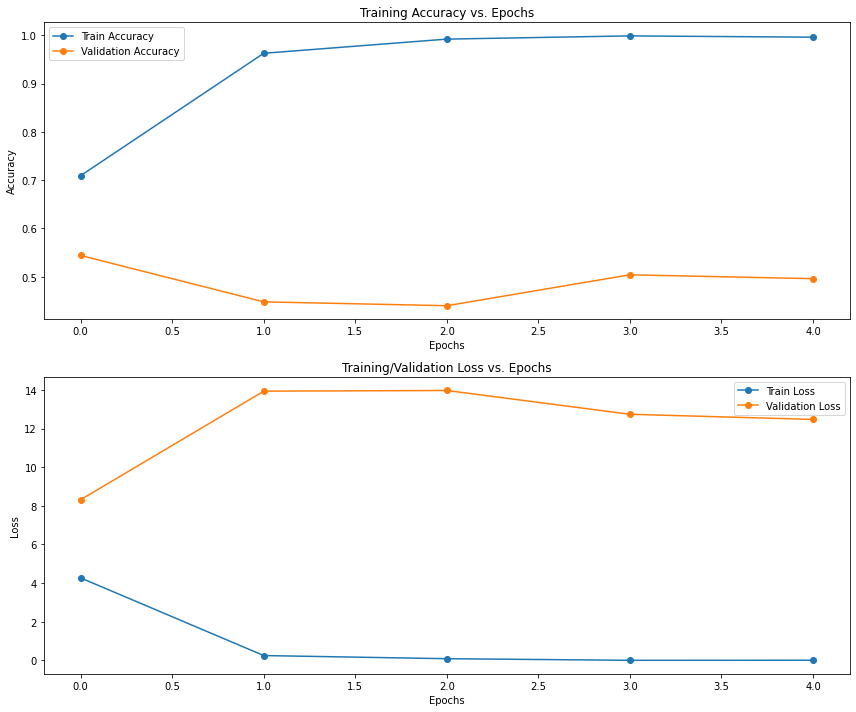

In [28]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')



plt.tight_layout()
plt.show()

**3.2. Testing the Model on Test Set**

In [29]:
test_dataset = '/content/drive/MyDrive/Darwin Digitech/dataset/test'

In [30]:
test_gen = tf.keras.preprocessing.image_dataset_from_directory(
  test_dataset,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 125 files belonging to 5 classes.


In [31]:
test_loss, test_accuracy = model_vgg.evaluate(test_gen, batch_size=batch_size)

4/4 [==============================] - 64s 11s/step - loss: 6.6578 - accuracy: 0.6080


In [32]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy*100}")

Test Loss:     6.657812595367432
Test Accuracy: 60.79999804496765


In [33]:
class_names = train_gen.class_names
print(class_names)

['boat_pose', 'cow_pose', 'downward_facing_dog_pose', 'plank_pose', 'tree_pose']


**3.3 Test VGG Model Predictions On Gradio GUI** 

In [34]:
def predict_image(img):
  img_5d=img.reshape(-1,180,180,3)
  prediction=model_vgg(img_5d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(5)}

In [35]:
# import gradio as gr

# image = gr.inputs.Image(shape=(180,180))
# label = gr.outputs.Label(num_top_classes=5)

# gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')